<a href="https://colab.research.google.com/github/chitransh1998/Heart-Disease-Prediction-/blob/main/Heart_Disease_Prediction_Using_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease Dataset Description

The Heart Disease Dataset contains a number of variables that can be used to predict the presence of heart disease in patients. Each attribute potentially contributes information that could be used to determine heart disease risk.

### Dataset Features:

- **Age**: The patient's age in years.
- **Sex**: The patient's sex (1 = male, 0 = female).
- **Chest Pain Type**: Type of chest pain experienced (values ranging from 1 to 4).
- **Resting Blood Pressure**: Resting blood pressure in mm Hg on admission to the hospital.
- **Serum Cholestrol**: Serum cholesterol in mg/dl.
- **Fasting Blood Sugar**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- **Resting Electrocardiographic Results**: Resting electrocardiographic results (values 0, 1, 2).
- **Maximum Heart Rate Achieved**: Maximum heart rate achieved during thallium stress test.
- **Exercise Induced Angina**: Exercise-induced angina (1 = yes; 0 = no).
- **ST Depression**: ST depression induced by exercise relative to rest.
- **Slope of the Peak Exercise ST Segment**: The slope of the peak exercise ST segment.
- **Number of Major Vessels**: Number of major vessels colored by fluoroscopy (0-3).
- **Thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).

### Target Variable:

- **Heart Disease Presence**: The presence of heart disease (0 = no, 1 = yes).




In [ ]:
# Load the data set
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

In [ ]:
# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Convert the target variable to binary
# 0 indicates no disease, 1 indicates any level of disease
y_binary = np.where(y == 0, 0, 1)
y_binary_series = pd.Series(y_binary.reshape(-1), name='HeartDisease')
# Now, X contains the features and y_binary contains the binary target
print("X features")
print(X.head())

print("Y: Heart Disease presence")
print(y_binary_series.head())

X features
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
Y: Heart Disease presence
0    0
1    1
2    1
3    0
4    0
Name: HeartDisease, dtype: int64


In [ ]:
heart_disease['variables']

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [ ]:
# Handling missing values (ex- by removing rows with missing data)

#Adding the Series to the DataFrame
X['binary_series'] = y_binary_series

#Detecting missing values
print(X.isnull().sum())
#Dropping missing values
X_clean = X.dropna()

X_clean.reset_index(drop=True, inplace=True)

print(X_clean.isnull().sum())
# Since 'y' (targets) do not have missing values, they can be used as is
# However, ensure that the rows in 'y' correspond to the rows in the cleaned 'X'
print(X.shape)
print(X_clean.shape)

#Assigning X and Y seperately again
y_binary_clean = X_clean['binary_series']
X_clean = X_clean.drop('binary_series', axis=1)

print(X_clean)
print(y_binary_clean)
y_binary_clean.shape

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               4
thal             2
binary_series    0
dtype: int64
age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
binary_series    0
dtype: int64
(303, 14)
(297, 14)
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0    

(297,)

Data preprocessing (Standardize the features, one-hot encoding, lable encoding)

**Standardization** is not typically required for decision trees, including Random Forest, because these algorithms make decisions based on splitting points and do not rely on the scale of the features. Decision trees work by recursively partitioning the data based on feature thresholds, and the scale of features does not impact the algorithm's performance.

Additionally, we trained a model with standardization and we were getting worse results than we are getting now. Hence, we are not standardizing the numerical variables in our dataset.

**One Hot Encoding** is carried out when the order of the categorical data does not matter. In this case, '*slope*', '*cp*', and '*thal*' are the categorical variables which have been one hot encoded because they don't have an inherent order in their reponse.

For variables, '*sex*', '*fbs*', and '*exang*' there is just 0 and 1 so one hot encoding is not required.

Whereas, for the variable '*restecg*' the categories are:

*  0: Normal
*  1: ST-T wave abnormality
*  2: Probable or definite left ventricular hypertrophy

Since there is an inherent order in these categories (normal < ST-T wave abnormality < left ventricular hypertrophy), one-hot encoding may not be the most appropriate choice. Instead, we consider **label encoding** for this variable. Label encoding will assign integer values to each category, preserving the order.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X_cat = X_clean[['cp','slope','thal']]
encoder = OneHotEncoder(drop='first',sparse=False)
X_cat_encoded = encoder.fit_transform(X_cat)
X_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoder.get_feature_names_out(X_cat.columns))

cat_vars = ['cp','slope','thal']
X = pd.concat([X_clean.drop(cat_vars, axis=1),X_encoded_df],axis=1)
print(X)

     age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak   ca  \
0     63    1       145   233    1        2      150      0      2.3  0.0   
1     67    1       160   286    0        2      108      1      1.5  3.0   
2     67    1       120   229    0        2      129      1      2.6  2.0   
3     37    1       130   250    0        0      187      0      3.5  0.0   
4     41    0       130   204    0        2      172      0      1.4  0.0   
..   ...  ...       ...   ...  ...      ...      ...    ...      ...  ...   
292   57    0       140   241    0        0      123      1      0.2  0.0   
293   45    1       110   264    0        0      132      0      1.2  0.0   
294   68    1       144   193    1        0      141      0      3.4  2.0   
295   57    1       130   131    0        0      115      1      1.2  1.0   
296   57    0       130   236    0        2      174      0      0.0  1.0   

     cp_2  cp_3  cp_4  slope_2  slope_3  thal_6.0  thal_7.0  
0     0.0   0

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Splitting training data into training and validation set (the code has been provided)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y_binary_clean, test_size = 0.3, random_state=20)

print("X_train shape:", X_train.shape)
print("X_validation shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_validation shape:", y_val.shape)

X_train shape: (207, 17)
X_validation shape: (90, 17)
y_train shape: (207,)
y_validation shape: (90,)


### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
### Fit the classifier on the training data
# Please set random_state=30
### WRITE CODE HERE ###

#Initializing the classifier
dt_classifier = DecisionTreeClassifier(random_state = 30)

#Fit classifier on training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [ ]:
### Make predictions on the training data

### WRITE CODE HERE ###
y_pred = dt_classifier.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_classification(y_true, y_pred):
    """
    Calculate accuracy, precision, and recall for a classification model.

    Parameters:
    - y_true: Actual labels
    - y_pred: Predicted labels

    Returns:
    - accuracy: Accuracy of the model
    - precision: Precision of the model
    - recall: Recall of the model
    """

    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate precision
    precision = precision_score(y_true, y_pred, average='weighted')

    # Calculate recall
    recall = recall_score(y_true, y_pred, average='weighted')

    return accuracy, precision, recall

Print accuracy, precision and recall for the predictions made on the training data.

In [ ]:
# Print accuracy, precision and recall for the predictions made on the training data.
accuracy, precision, recall = evaluate_classification(y_train, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


In [ ]:
### Make predictions on the validation data
### WRITE CODE HERE ###

y_pred_val = dt_classifier.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [ ]:
### WRITE CODE HERE ###

accuracy, precision, recall = evaluate_classification(y_val, y_pred_val)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.7222
Precision: 0.7233
Recall: 0.7222


Plot ROC curve and obtain AUC for predictions on the validation data.

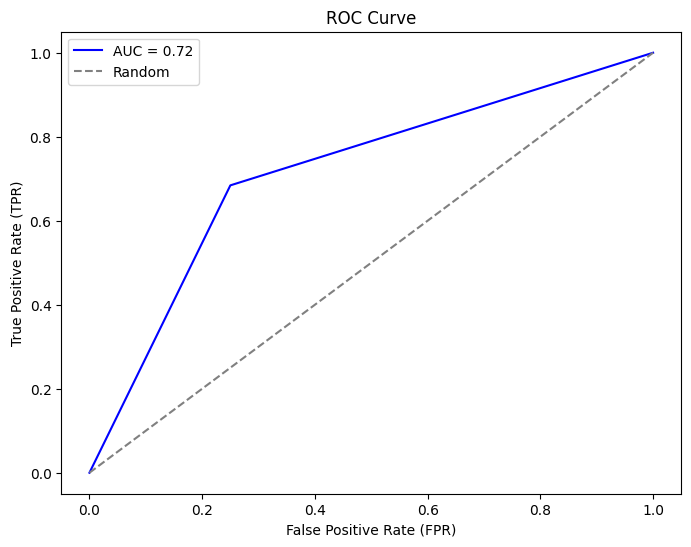

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


#Predicting probabilities for positive class
y_probs = dt_classifier.predict_proba(X_val)[:,1]

#Calculating the ROC curve
fpr, tpr, threshold = roc_curve(y_val, y_probs)

#Calculating AUC value
auc_value = roc_auc_score(y_val, y_probs)

#Plotting the ROC curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_value:.2f}')
#Adding the random classifier
plt.plot([0, 1], [0,1], linestyle = '--', color = 'gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance.<br>

Ans -

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability.


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=30
### WRITE CODE HERE ###

#Initialize the classifier
rf_classifier = RandomForestClassifier(random_state = 30)

#Fit classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [ ]:
### Make predictions on the training data
### WRITE CODE HERE ###
y_pred_rf = rf_classifier.predict(X_train)

Print accuracy, precision and recall for the predictions made on the training data.

In [ ]:
accuracy, precision, recall = evaluate_classification(y_train, y_pred_rf)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


In [ ]:
### Make predictions on the validation data
### WRITE CODE HERE ###
y_pred_val_rf = rf_classifier.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [ ]:
### WRITE CODE HERE ###
accuracy, precision, recall = evaluate_classification(y_val, y_pred_val_rf)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.8222
Precision: 0.8272
Recall: 0.8222


Plot ROC curve and obtain AUC for the validation predictions

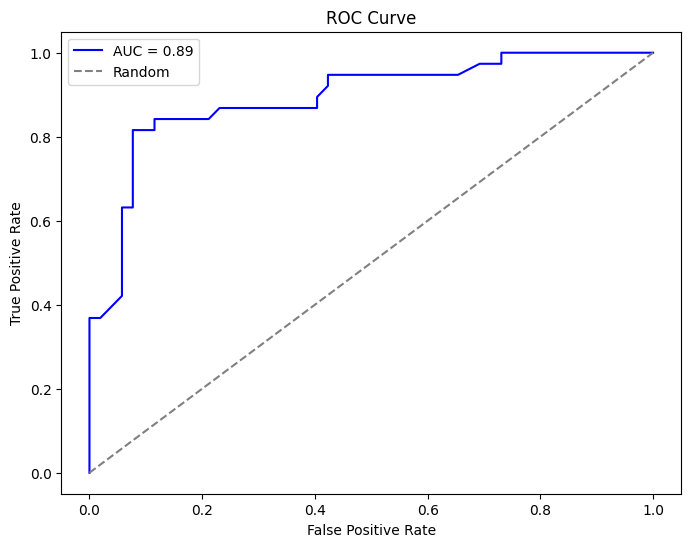

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

#Predicting proabilities for positive class
y_probs_rf = rf_classifier.predict_proba(X_val)[:, 1]

#Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs_rf)

#Calculate AUC value
auc_value = roc_auc_score(y_val, y_probs_rf)

#Plot ROC curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0,1], linestyle='--', color = 'gray', label = 'Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated.

Ans-

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.

There are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn.ensemble.RandomForestClassifier's doc to understand what the parameters depict

#Setting up the hyperparameter grid
param_grid = {
    'max_depth': [2,4,10,None], #Maximum number of levels in the tree
    'max_features': ['sqrt'], #Number of features to consider at every split
    'min_samples_leaf': [1, 2, 4], #Minimum number of samples required at each leaf node
    'min_samples_split': [2, 5, 10], #Minimum number of samples required to split a node
    'n_estimators': [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)] #Number of trees in random forest
}
print(param_grid)

{'max_depth': [2, 4, 10, None], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


'n_estimators' - Number of trees in the forest, higher number of trees generally improves the model performance but also increases computational cost.

'max_depth' - The maximum depth of the trees in the forest. Deeper trees may capture more complex relationships but are more prone to overfitting.

'min_samples_split' - It represents the minimum number of samples needed to split an internal node before declaring the node as a terminal leaf.

'min_samples_leaf' - Controls the minimum number of samples required to be a leaf node i.e. a terminal node or a decision

In [ ]:
#Define the random forest classifier
rf = RandomForestClassifier(random_state=30)

In [ ]:
#Create the Grid Search Object
grid_search = GridSearchCV(estimator = rf, scoring='recall', param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

#Verbose controls the amt of info printed during the grid search
# 2 - Display a progress bar and the estimated time remaining for each combination

#n_jobs controls the number of parallel jobs to run during the grid search
# Any positive number is the specified number of processors.

In [ ]:
### Fit on the training data with all sets of parameters.
### WRITE CODE HERE ###
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10, None],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157,
                                          178, 200]},
             scoring='recall', verbose=2)

Display the parameters of the best model.

In [ ]:
# Print the best parameters
### WRITE CODE HERE ###
best_params = grid_search.best_params_
print(best_params)

#Get the best model
best_rf_classifier = grid_search.best_estimator_

{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 73}


In [ ]:
#Parameter values previously
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 30,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Print the best score
best_score = grid_search.best_score_

print(f'Best Score: {best_score:.4f}')

Best Score: 0.8182


In [ ]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### Make predictions on the validation set and display accuracy, precision and recall.

### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### WRITE CODE HERE ###
y_pred_rf = best_rf_classifier.predict(X_train)

accuracy, precision, recall = evaluate_classification(y_train, y_pred_rf)

print(f'Accuracy on Training set: {accuracy:.4f}')
print(f'Precision on Training set: {precision:.4f}')
print(f'Recall on Training set: {recall:.4f}\n')

### Make predictions on the validation set and display accuracy, precision and recall.
### WRITE CODE HERE ###
y_pred_val_rf = best_rf_classifier.predict(X_val)

accuracy, precision, recall = evaluate_classification(y_val, y_pred_val_rf)

print(f'Accuracy on Validation set: {accuracy:.4f}')
print(f'Precision on Validation set: {precision:.4f}')
print(f'Recall on Validation set: {recall:.4f}')


Accuracy on Training set: 0.8551
Precision on Training set: 0.8567
Recall on Training set: 0.8551

Accuracy on Validation set: 0.8333
Precision on Validation set: 0.8403
Recall on Validation set: 0.8333


The hyperparameters are now tuned so the model is not overfitting anymore and so we don't get a perfect score.

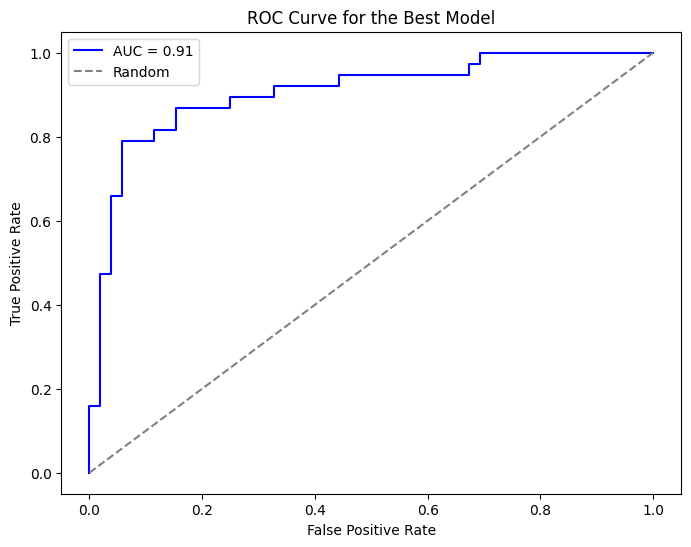

In [ ]:
# Plot the ROC curve on validation set by giving appropriate names for title and axes.

### WRITE CODE HERE

#Predicting proabilities for positive class
y_probs_rf = best_rf_classifier.predict_proba(X_val)[:, 1]

#Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs_rf)

#Calculate AUC value
auc_value = roc_auc_score(y_val, y_probs_rf)

#Plot ROC curve
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0,1], linestyle='--', color = 'gray', label = 'Random')
plt.title('ROC Curve for the Best Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()